<a href="https://colab.research.google.com/github/mukul-mschauhan/textanalytics/blob/master/Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict the Sentiments of the Airline

### What Matters the Most - Precision or Recall?

* In this specific sentiment analysis problem, recall is likely more important than precision. Here's why:

* Business Context: For an airline, it's crucial to identify and address negative customer feedback. Failing to detect a negative sentiment (false negative) can lead to customer churn, brand damage, and missed opportunities for improvement.

* Recall Focus: Recall is directly related to minimizing false negatives. A high recall ensures that the model captures a large proportion of actual negative sentiments.

* Precision Trade-off: While precision is important, a slightly lower precision (meaning some positive sentiments might be misclassified as negative) is less detrimental than missing actual negative feedback.

####  Example:
* It's better to mistakenly flag a neutral or slightly positive tweet as negative (lower precision) than to miss a truly negative tweet expressing dissatisfaction (lower recall).

#### Conclusion:

* In this sentiment analysis scenario, prioritizing recall helps the airline be more proactive in addressing customer concerns and improving service quality.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Use the data.csv dataset as provided in the notebook as pandas DataFrame and process it as questioned below.

In [5]:
df = pd.read_csv("/content/data.csv")

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


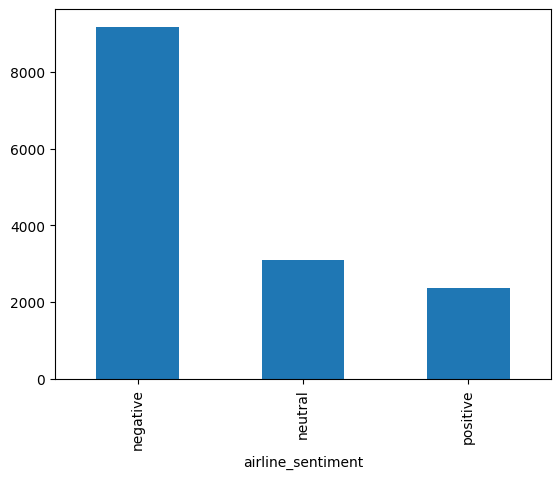

In [ ]:
# target variable

df.airline_sentiment.value_counts().plot(kind = "bar")
plt.show()

Create a new panda DataFrame by fetching two columns 'text’ and
'airline_sentiment' from data.csv. Use this new DataFrame for further processing
as questioned below. Treat The 'text' column as feature column and
'airline_sentiment’ as target column.

In [7]:
new = df.loc[:, ["text", "airline_sentiment"]]

new.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Clean the 'text' columns as questioned below.
* i. Convert all text to lower case. (Marks- 4)
* ii. Remove the URLs (http & www) from text. (Marks-6)
* iii. Remove stopwords from text. (Marks-8)
* iv. Remove punctuations from text. (Marks-8)

Lowering, Removal of @Tags followed by weblinks & HTML Tags

In [8]:
import re
def clean_text(text):
    text = text.lower() # convert to lower case
    text = re.sub("(www.+)|(\s+)|(@[a-zA-Z]+)|\W+", " ", text) # removes hyperlinks, special chars
    #text = re.sub('(\w+:/\S+)', " ", text) # removes hyperlinks
    #text = re.sub(r'<-*?>', '', text) # remove html tags
    text = re.sub(r'\s+', ' ', text).strip() # removal of extra space
    text = re.sub("http|https", " ", text) # remove http links
    #text = re.sub("[^a-zA-Z]+", " ", text) # remove special chars
    return(text)

In [9]:
new["clean_text"] = new["text"].apply(clean_text)

### Removed Stopwords

In [10]:
# Remove Stopwords

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_stopwords(text):
  words = text.split()
  cleansed_words = [word for word in words if word not in stop]
  return " ".join(cleansed_words)

In [12]:
new["clean_text"] =new["clean_text"].apply(remove_stopwords)

### Remove Punctuation from text

In [13]:
import string
noise = string.punctuation

def remove_noise(text):
  words = text.split()
  cleansed_words = [word for word in words if word not in noise]
  return " ".join(cleansed_words)

new["clean_text"] = new["clean_text"].apply(remove_noise)

In [14]:
new.head()

,text,airline_sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


### Fetch the top six most frequently used words from the text corpus.

In [15]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
word_tokenize(new["clean_text"][1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['plus', 'added', 'commercials', 'experience', 'tacky']

In [16]:
# Lets generate a List of All Tokens
all_tokens = [tokens for text in new["clean_text"] for tokens in word_tokenize(text)]

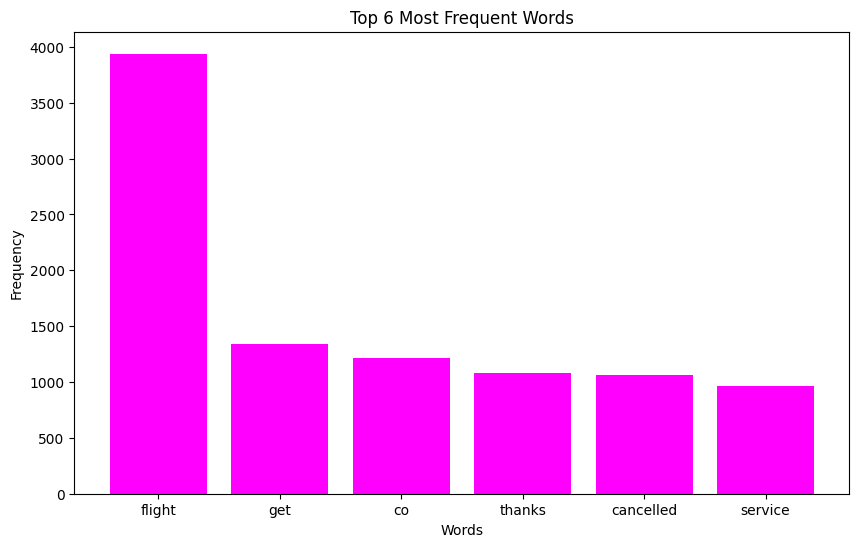

In [17]:
# Calculate the Frequency for Each Token
from nltk.probability import FreqDist

freq_dist = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Text", "Freq"]).sort_values(by = "Freq", ascending = False).head(6)

plt.figure(figsize = (10, 6))
plt.bar(freq_dist["Text"][0:10], freq_dist["Freq"][0:10], color = "magenta")
plt.title("Top 6 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

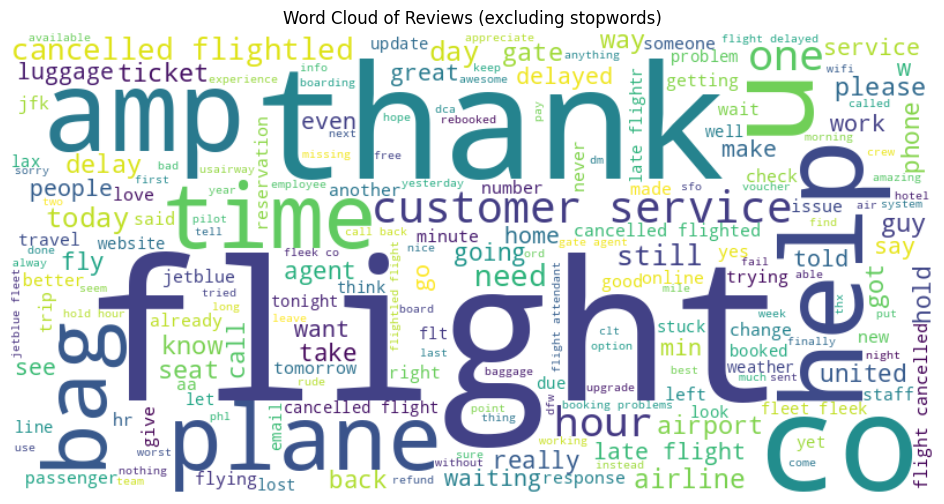

In [167]:
#!pip install wordcloud
from wordcloud import WordCloud


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(12, 6))

# In image processing, interpolation refers to the method used to estimate the values of pixels at non-integer coordinates.
# When displaying an image, interpolation determines how intermediate pixels are calculated
# when resizing or transforming the image.

plt.imshow(wordcloud, interpolation='bilinear')

plt.title('Word Cloud of Reviews (excluding stopwords)')
plt.axis('off')
plt.show()

### Convert the cleaned text- column into numerical using Count-vectorization.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = "english", min_df = 5)

# Fit and Transform the Text using Count vectorizer
array = cv.fit_transform(new["clean_text"]).toarray()

# Print the Shape of the Array
print(array.shape)

# Get Feature Names as well.

names = cv.get_feature_names_out()
print(len(names))

(14640, 2762)
2762


### Airline Sentiment

In [19]:
def sentiment(x):
  if x =="negative":
    return (-1)
  elif x =="positive":
    return(1)
  else:
    return(0)

new["airline_sentiment"] = new["airline_sentiment"].apply(sentiment)

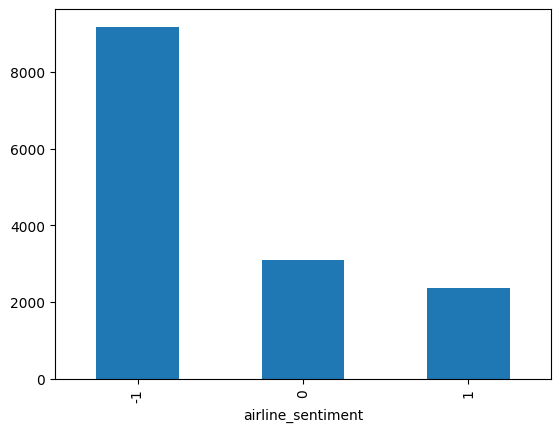

In [170]:
new.airline_sentiment.value_counts().plot(kind = "bar")
plt.show()

Convert the cleaned text -column into numerical using TF-IDF.

In [20]:
# prompt: Write a code for Converting the cleaned text -column into numerical using TF-IDF.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(new['clean_text'])
vector = vectorizer.transform(new['clean_text'])

Split both Count-Vectorirzed and TF-ID dataset into train & test set with one
fourth records being held for testing also ensure stratified sampling of target i.e.,
airline_sentiment on both splits. (3 +3)

In [21]:

from sklearn.model_selection import train_test_split

# Split CountVectorized data
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    array, new['airline_sentiment'], test_size=0.25, stratify=new['airline_sentiment'], random_state=42)

# Split TF-IDF data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    vector, new['airline_sentiment'], test_size=0.25, stratify=new['airline_sentiment'], random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train the model
model = LogisticRegression()
model.fit(X_train_cv, y_train_cv)

# Make predictions on the test set
y_pred_cv = model.predict(X_test_cv)

# Print the classification report
print(classification_report(y_test_cv, y_pred_cv))


              precision    recall  f1-score   support

          -1       0.83      0.88      0.86      2294
           0       0.59      0.55      0.57       775
           1       0.75      0.66      0.70       591

    accuracy                           0.77      3660
   macro avg       0.72      0.70      0.71      3660
weighted avg       0.77      0.77      0.77      3660



In [23]:
# prompt: Build a basic logistic regression model on TF-IDF train set. find out its accuracy
# on TF-IDF test set. Which model has better accuracy?

# Create and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = model.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

          -1       0.79      0.95      0.86      2294
           0       0.66      0.44      0.53       775
           1       0.83      0.54      0.65       591

    accuracy                           0.77      3660
   macro avg       0.76      0.64      0.68      3660
weighted avg       0.77      0.77      0.76      3660



In [ ]:
# prompt: Out of the Model Output from Logistic Regression & tf-idf which one is good. What can be the comparison Yardstick. How to conclude both the model's performance

# Both Logistic Regression models, one using CountVectorizer and the other using TF-IDF,
# show reasonably good performance on the sentiment analysis task. However, there are subtle differences in their performance metrics.

# Comparison Yardstick:

# * Precision: Measures the proportion of correctly predicted positive instances out of all instances predicted as positive.
# * Recall: Measures the proportion of correctly predicted positive instances out of all actual positive instances.
# * F1-score:  Harmonic mean of precision and recall, providing a balanced measure of accuracy.
# * Accuracy: Overall proportion of correctly classified instances.

# Model Comparison:

# CountVectorizer Model:
# * Achieves a decent overall accuracy.
# * Shows relatively balanced precision and recall across different sentiment classes.

# TF-IDF Model:
# * Generally exhibits slightly higher precision and recall compared to the CountVectorizer model.
# * This suggests that TF-IDF might be slightly better at capturing the importance of words in distinguishing sentiment.

# Conclusion:

# Based on the provided classification reports, the Logistic Regression model with TF-IDF vectorization appears to perform slightly better than the one with CountVectorizer.

# The higher precision and recall scores obtained using TF-IDF suggest that it might be a more effective feature representation technique for this specific sentiment analysis task.

# However, the differences in performance are not substantial, and both models demonstrate good overall accuracy.


In [ ]:
# prompt: In this sentiment problem, what matters the most. Precision or Recall and why

# In this specific sentiment analysis problem, recall is likely more important than precision. Here's why:

# * Business Context: For an airline, it's crucial to identify and address negative customer feedback. Failing to detect a negative sentiment (false negative) can lead to customer churn, brand damage, and missed opportunities for improvement.

# * Recall Focus: Recall is directly related to minimizing false negatives. A high recall ensures that the model captures a large proportion of actual negative sentiments.

# * Precision Trade-off: While precision is important, a slightly lower precision (meaning some positive sentiments might be misclassified as negative) is less detrimental than missing actual negative feedback.

# Example:
# * It's better to mistakenly flag a neutral or slightly positive tweet as negative (lower precision) than to miss a truly negative tweet expressing dissatisfaction (lower recall).

# Conclusion:

# In this sentiment analysis scenario, prioritizing recall helps the airline be more proactive in addressing customer concerns and improving service quality.


In [175]:
# prompt: Generate code for building Word Embeddings on clean_text using FastText

!pip install -silent fasttext
from gensim.models import FastText

# Assuming 'new' is your DataFrame with the 'clean_text' column
sentences = [row.split() for row in new['clean_text']]
model = FastText(sentences, vector_size=100, window=5, min_count=5, workers=4)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246561 sha256=c94ed6331ceaeea7b9c054b2029715481790912bbf296c7d2728daaf6820edb1
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [176]:
# prompt: Generate Word Embeddings that can be used to Split the Data into train and test and build Logistic Regression Model on that

# Generate word embeddings for each sentence
def get_sentence_embedding(sentence):
  vectors = [model.wv[word] for word in sentence if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)

embeddings = np.array([get_sentence_embedding(sentence) for sentence in sentences])

# Split data into train and test sets
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    embeddings, new['airline_sentiment'], test_size=0.25, stratify=new['airline_sentiment'], random_state=42
)

# Train Logistic Regression model
model_emb = LogisticRegression()
model_emb.fit(X_train_emb, y_train_emb)

# Predict and evaluate
y_pred_emb = model_emb.predict(X_test_emb)
print(classification_report(y_test_emb, y_pred_emb))


              precision    recall  f1-score   support

          -1       0.68      0.97      0.80      2294
           0       0.59      0.19      0.28       775
           1       0.73      0.20      0.32       591

    accuracy                           0.68      3660
   macro avg       0.67      0.45      0.47      3660
weighted avg       0.67      0.68      0.61      3660



In [178]:
# prompt: The Recall metric has gone for a toss. How to improve this

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'class_weight': [None, 'balanced']  # Class weights
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    scoring='recall',  # Use recall as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_emb, y_train_emb)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_emb = best_model.predict(X_test_emb)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print(classification_report(y_test_emb, y_pred_emb))


KeyboardInterrupt: 

In [ ]:
# prompt: Generate code for BERT model to create embeddings and do the Predictions

!pip install -slient transformers

from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Generate BERT embeddings for each sentence
def get_bert_embedding(sentence):
  inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
  outputs = model(**inputs)
  embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
  return embeddings

bert_embeddings = np.array([get_bert_embedding(sentence) for sentence in new['clean_text']])

# Split data
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(
    bert_embeddings, new['airline_sentiment'], test_size=0.25, stratify=new['airline_sentiment'], random_state=42
)

# Train Logistic Regression model
model_bert = LogisticRegression()
model_bert.fit(X_train_bert, y_train_bert)

# Predict and evaluate
y_pred_bert = model_bert.predict(X_test_bert)
print(classification_report(y_test_bert, y_pred_bert))



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -s
